<a href="https://colab.research.google.com/github/radhakrishnan-omotec/duo-repo/blob/main/ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input

In [2]:
from google.colab import drive

In [3]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Verify by listing the files in the drive
!ls /content/drive/My\ Drive/

Mounted at /content/drive
 1722880327504999.mp4
 ADAMS.gdoc
'Advik Ghatiwala Youth Ambassadors Program Video.mov'
 ca07313a175ad06dde16bcdf649f80ef.jpg
'Colab Notebooks'
'ConsultAid Interview.gslides'
'Copy of Jeoparty · SlidesCarnival.gslides'
'Council Election  (File responses)'
'Council Election .gform'
 DATASET
 e688968df4891e1ecad14b326bbe9cef.jpg
'Ghatiwala DW Magazine ad (8.5w x 11 w in) (1).pdf'
'Ghatiwala DW Magazine ad (8.5w x 11 w in).pdf'
 hqdefault.jpg
'IPL Profit.gsheet'
'JPDS Daily'
'JPDS Daily.gsheet'
 MVI_3960.mov
 Rt.gsheet
'TechCrunch_Disrupt_San_Francisco_2019_-_Day_1_(48834070763)_(cropped).jpg'
'Untitled document.gdoc'
'Untitled presentation (1).gslides'
'Untitled presentation.gslides'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet (2).gsheet'
'Untitled spreadsheet.gsheet'
'usc film shoot.mp4'
'Workout Logger.gsheet'
'Your big idea.gslides'


In [5]:
classes_dict = {
0:'CLASS_1-DRUNK-IMAGES',
1:'CLASS_2-SOBER-IMAGES'
}


# Remove underscores from the dictionary values
classes_dict_cleaned = {key: value.replace('_', ' ') for key, value in classes_dict.items()}

# Now, classes_dict_cleaned contains the cleaned class names
print(classes_dict_cleaned)

{0: 'CLASS 1-DRUNK-IMAGES', 1: 'CLASS 2-SOBER-IMAGES'}


In [4]:
# Function to make predictions
def prediction(path, model, classes_dict):
    """
    This function takes an image file path, loads a pre-trained model,
    preprocesses the image, and makes a prediction using the model.

    Parameters:
    - path: The path to the input image.
    - model: The pre-trained model for classification.
    - classes_dict: A dictionary mapping class indices to human-readable labels.

    Returns:
    - img: The original input image.
    - predicted_class: The predicted class label.
    """

    # Load and preprocess the image
    img = load_img(path, target_size=(180, 180))  # Resizing the image to the model input size
    img_arr = img_to_array(img)                   # Convert image to array
    processed_img_arr = preprocess_input(img_arr) # Preprocess image for model compatibility

    # Expand image dimensions to match the input shape for the model (batch_size, height, width, channels)
    img_exp_dim = np.expand_dims(processed_img_arr, axis=0)

    # Make predictions using the model
    prediction_probabilities = model.predict(img_exp_dim)
    pred_class_index = np.argmax(prediction_probabilities)
    predicted_class = classes_dict[pred_class_index]
    predicted_probability = prediction_probabilities[0][pred_class_index]

    # Display the predicted class and probability
    print(f"Predicted Class: {predicted_class} with probability {predicted_probability:.2f}")

    # Plot the input image with the prediction
    plt.imshow(img)
    plt.axis('off')  # Remove axis
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    return img, predicted_class

classes_dict_cleaned :  {0: 'CLASS 1-DRUNK-IMAGES', 1: 'CLASS 2-SOBER-IMAGES'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted Class: CLASS 2-SOBER-IMAGES with probability 101.58


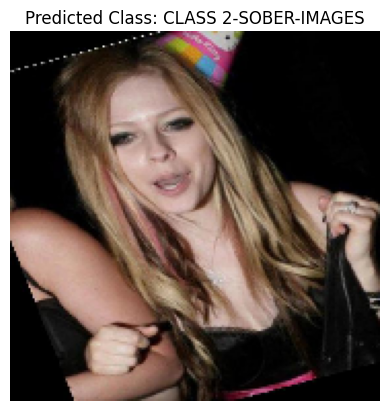

Final Predicted Class: CLASS 2-SOBER-IMAGES


In [6]:
def predict(image):
    """
    This function takes an image object from the user interface,
    loads a pre-trained model, and makes a prediction.

    Parameters:
    - image: The image object passed from the user interface.

    Returns:
    - img: The processed image.
    - predicted_class: The predicted class label.
    """

    # Load the pre-trained model (ensure the path to your model is correct)
    model = load_model("/content/drive/MyDrive/DATASET/CNN_drunksober_classification_model.keras")  # Adjust the path accordingly

    # Extract the file path from the image object
    path = image.name

    # Define your class dictionary mapping indices to class names
    print("classes_dict_cleaned : ",classes_dict_cleaned)

    # Call the prediction function
    img, predicted_class = prediction(path, model, classes_dict_cleaned)

    return img, predicted_class

# Main code to call the prediction function
if __name__ == "__main__":
    # Example path to an image
    image_path = "/content/drive/MyDrive/DATASET/CLASS_1-DRUNK-IMAGES/DRunkface10B3_jpg.rf.fa63548c9428e9aa6488cb432aae2795.jpg"

    # Assuming image is an object similar to what would be passed by a UI (for testing)
    class ImageObject:
        def __init__(self, name):
            self.name = name

    # Create an image object
    image = ImageObject(image_path)

    # Call the predict function
    img, predicted_class = predict(image)

    # Optionally, print the predicted class for logging
    print(f"Final Predicted Class: {predicted_class}")